In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns

MemoryError: 

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
clean_dataDirectory = "data/results/cleaned_data.csv"
standard_dataDirectory = "data/results/standardized_data.csv"
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Read data from the "property" table
query = "SELECT * FROM property"
data = pd.read_sql_query(query, conn)


# Print the contents of the data
print(data)

# Close the database connection
conn.close()
# print(data.head(5))
data = data.dropna()

          pr_id  type_estate  district posted_date   area         price  \
0      13411848            0        26  2024-05-11  167.0  4.175000e+10   
1      14600637            0        11  2024-05-13  200.0  1.600000e+10   
2      15114948            0         8  2024-05-14  210.0  3.360000e+10   
3      15251328            0        11  2024-05-11   95.0  2.360000e+10   
4      18480219            2        26  2024-05-09   60.0  7.450000e+09   
...         ...          ...       ...         ...    ...           ...   
14605  39860993            2        11  2024-05-15   42.0  6.300000e+09   
14606  39860995            2        29  2024-05-15   79.0  2.300000e+10   
14607  39861005            1        12  2024-05-15   91.0  2.500000e+10   
14608  39861018            0         8  2024-05-15   80.0  1.500000e+10   
14609  39861046            1         4  2024-05-15  100.0  5.600000e+10   

       legal_document  interior  num_bedrooms  num_bathrooms  num_floors  \
0                   2  

In [ ]:
collum_list = data['num_bedrooms'][data['num_bedrooms'] >= 0]
# print(collum_list.mean())
data['num_bedrooms'] = data['num_bedrooms'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['num_bedrooms']

0        4
1        4
2        4
3        4
4        4
        ..
14605    4
14606    6
14607    6
14608    4
14609    7
Name: num_bedrooms, Length: 14601, dtype: int64

In [ ]:
collum_list = data['num_bathrooms'][data['num_bathrooms'] >= 0]
# print(collum_list.mean())
data['num_bathrooms'] = data['num_bathrooms'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['num_bathrooms']

0        4
1        4
2        4
3        4
4        2
        ..
14605    3
14606    5
14607    6
14608    4
14609    4
Name: num_bathrooms, Length: 14601, dtype: int64

In [ ]:
collum_list = data['num_floors'][data['num_floors'] >= 0]
# print(collum_list.mean())
data['num_floors'] = data['num_floors'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['num_floors']

0        5
1        5
2        3
3        5
4        3
        ..
14605    4
14606    5
14607    5
14608    5
14609    8
Name: num_floors, Length: 14601, dtype: int64

In [ ]:
collum_list = data['entrance'][data['entrance'] >= 0]
# print(collum_list.mean())
data['entrance'] = data['entrance'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['entrance']

0         6.0
1        30.0
2         6.0
3        15.0
4         2.2
         ... 
14605     3.0
14606     6.0
14607    25.0
14608     6.0
14609     6.0
Name: entrance, Length: 14601, dtype: float64

In [ ]:
collum_list = data['frontage'][data['frontage'] >= 0]
# print(collum_list.mean())
data['frontage'] = data['frontage'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['frontage']

0         5.0
1        10.0
2         5.0
3         7.5
4         5.0
         ... 
14605     4.0
14606     5.4
14607     6.8
14608     5.0
14609     8.0
Name: frontage, Length: 14601, dtype: float64

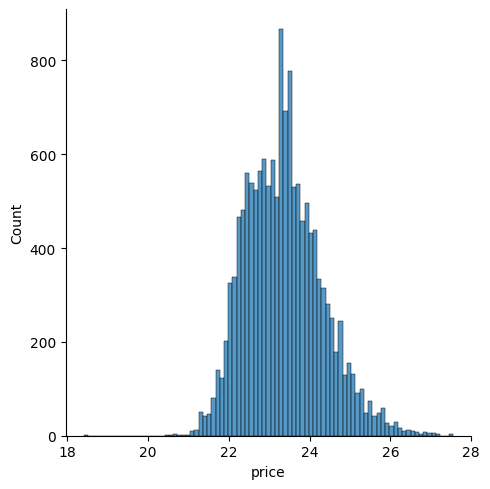

In [ ]:
sns.displot(np.log(data['price']))
data['log_price'] = np.log(data['price'])

In [ ]:
clean_train_data = data.drop(['price', 'price_per_sqm', 'log_price', 'pr_id', 'posted_date'], axis=1)
clean_train_label = data['log_price']
train_data, test_data, train_label, test_label = train_test_split(clean_train_data, clean_train_label, test_size=0.2, random_state=42)

In [ ]:
import joblib 

In [ ]:
import math

In [ ]:
e = math.e
LR = LinearRegression()
print(train_data.shape)
print(train_label.shape)
LR.fit(train_data, train_label)
pred_train = LR.predict(train_data)
MAE_train = np.mean(np.abs(pred_train - train_label))
print("MAE in train dataset: ", MAE_train)
pred_test = LR.predict(test_data)
MAE_test = np.mean((np.abs(e**pred_test - e**test_label)))
print("MAE in test dataset: ", MAE_test)
joblib.dump(LR, 'model/LR.joblib')

(11680, 10)
(11680,)
MAE in train dataset:  0.4833490592189948
MAE in test dataset:  2.60569844776352e+133


['model/LR.joblib']

In [ ]:
predictions = LR.predict(test_data)

print(test_label)

print(predictions)
# # Tính toán độ chính xác
# accuracy = accuracy_score(test_label, predictions)

# # Hiển thị độ chính xác
# print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%")

169      25.165917
9361     23.526626
3014     22.302245
1475     22.942469
7425     22.863332
           ...    
740      23.981362
3462     23.961944
5188     22.071339
1188     24.604830
13101    21.577681
Name: log_price, Length: 2921, dtype: float64
[23.89460222 22.80794091 22.74884951 ... 22.73889237 23.43955285
 22.57689409]
